# Question 3
* 주제 : 시간 변화에 따른 dorms와 offices 에너지 사용량 변화 비교

## 데이터 확인

* 같은 계절 데이터를 쓰는 dorm와 office 데이터 확인

In [149]:
import pandas as pd

In [150]:
# meta data confirm
meta_data = pd.read_csv("./data/all_buildings_meta_data.csv")
meta_data

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
0,PrimClass_Everett,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,105530.0000,9804.053590,Primary/Secondary School,America/New_York,NaN,Everett,PrimClass,weather12.csv
1,UnivClass_Clifford,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Classroom,NaN,56969.0000,5292.591007,College/University,America/New_York,1967,Clifford,UnivClass,weather2.csv
2,Office_Elizabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,294651.0000,27373.961850,Commercial Real Estate,America/Los_Angeles,NaN,Elizabeth,Office,weather22.csv
3,Office_Ellie,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Commercial Property,NaN,NaN,NaN,Office,NaN,496517.0000,46127.918850,Bank/Financial Services,America/Los_Angeles,NaN,Ellie,Office,weather28.csv
4,PrimClass_Elisabeth,31/12/12 23:00,01/01/12 00:00,NaN,NaN,Education,NaN,NaN,NaN,Primary/Secondary Classroom,NaN,233062.0000,21652.158990,Primary/Secondary School,America/New_York,NaN,Elisabeth,PrimClass,weather23.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,Office_Lane,30/11/15 23:00,01/12/14 00:00,NaN,Heat network,Education,Heat Network,8.0,NaN,Office,NaN,34455.2439,3201.000000,College/University,Europe/London,1907,Lane,Office,weather5.csv
503,Office_Cameron,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,53303.0000,4952.008609,College/University,America/New_York,1981,Cameron,Office,weather2.csv
504,UnivLab_Lea,30/11/15 23:00,01/12/14 00:00,NaN,Gas,Education,Gas,6.0,NaN,College Laboratory,NaN,16802.4479,1561.000000,College/University,Europe/London,1995,Lea,UnivLab,weather5.csv
505,UnivLab_Carlos,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,College Laboratory,NaN,30143.0000,2800.375129,College/University,America/New_York,1951,Carlos,UnivLab,weather2.csv


In [151]:
meta_data[meta_data["uid"] == "UnivDorm_Camila"]

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
422,UnivDorm_Camila,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Dormitory,NaN,129664.0,12046.17459,College/University,America/New_York,1941,Camila,UnivDorm,weather2.csv


UnivDorm_Camila 은 weather2.csv 데이터 사용

In [152]:
meta_data[meta_data["uid"] == "Office_Cora"]

,uid,dataend,datastart,energystarscore,heatingtype,industry,mainheatingtype,numberoffloors,occupants,primaryspaceusage,rating,sqft,sqm,subindustry,timezone,yearbuilt,nickname,primaryspaceuse_abbrev,newweatherfilename
440,Office_Cora,31/12/15 23:00,01/01/15 00:00,NaN,NaN,Education,NaN,NaN,NaN,Office,NaN,42755.0,3972.067765,College/University,America/New_York,1866,Cora,Office,weather2.csv


Office_Cora 은 weather2.csv 데이터 사용

In [153]:
# weather2.csv confirm
weather = pd.read_csv("./data/weather2.csv")
weather

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeEDT,TimeEST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2015-01-01 00:56:00,Overcast,2015-01-01 05:56:00<br />,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,NaN,12:56 AM,16.1,SW,18.5,230,2015-01-01 00:56:00
1,2015-01-01 01:56:00,Overcast,2015-01-01 06:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,1:56 AM,16.1,WSW,14.8,240,2015-01-01 01:56:00
2,2015-01-01 02:56:00,Overcast,2015-01-01 07:56:00<br />,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,NaN,2:56 AM,16.1,SW,14.8,220,2015-01-01 02:56:00
3,2015-01-01 03:56:00,Overcast,2015-01-01 08:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,3:56 AM,16.1,SW,18.5,220,2015-01-01 03:56:00
4,2015-01-01 04:56:00,Overcast,2015-01-01 09:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,4:56 AM,16.1,SSW,14.8,210,2015-01-01 04:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10909,2015-12-31 17:56:00,Light Snow,2015-12-31 22:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,NaN,5:56 PM,16.1,NNW,9.3,330,2015-12-31 17:56:00
10910,2015-12-31 18:56:00,Light Snow,2015-12-31 23:56:00<br />,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,NaN,6:56 PM,8.0,NNW,13.0,330,2015-12-31 18:56:00
10911,2015-12-31 19:56:00,Light Snow,2016-01-01 00:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,NaN,7:56 PM,6.4,NNW,14.8,330,2015-12-31 19:56:00
10912,2015-12-31 20:56:00,Light Snow,2016-01-01 01:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,NaN,8:56 PM,6.4,NNW,9.3,330,2015-12-31 20:56:00


In [154]:
dorm = pd.read_csv("./data/UnivDorm_Camila.csv")
dorm

,timestamp,UnivDorm_Camila
0,2015-01-01 00:00:00,222.625000
1,2015-01-01 01:00:00,225.199997
2,2015-01-01 02:00:00,223.750000
3,2015-01-01 03:00:00,228.149994
4,2015-01-01 04:00:00,214.600006
...,...,...
8755,2015-12-31 19:00:00,239.975006
8756,2015-12-31 20:00:00,242.925003
8757,2015-12-31 21:00:00,226.675003
8758,2015-12-31 22:00:00,225.525009


In [155]:
office = pd.read_csv("./data/Office_Cora.csv")
office

,timestamp,Office_Cora
0,2015-01-01 00:00:00,73.925003
1,2015-01-01 01:00:00,75.875000
2,2015-01-01 02:00:00,76.025002
3,2015-01-01 03:00:00,75.349998
4,2015-01-01 04:00:00,72.250000
...,...,...
8755,2015-12-31 19:00:00,97.800003
8756,2015-12-31 20:00:00,98.650002
8757,2015-12-31 21:00:00,96.525002
8758,2015-12-31 22:00:00,95.900002


## 데이터 처리 & 통합

energy 데이터의 경우 시간당 에너지로 기록되어 있음.
하지만 weather 데이터의 경우 대부분 시간당 기록되어 있지만 일부 한 시간 동안 두번 측정된 데이터가 존재
우리는 시간당 에너지의 변화가 알고 싶기 때문에 weather 데이터 중 한시간 동안 두번 측정된 데이터를 하나 값만 남김

In [156]:
# 원본 데이터에 영향을 주지 않기 위해 복사본 데이터를 명시적으로 표시
time_weather = weather.copy()
time_weather

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,TimeEDT,TimeEST,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1
0,2015-01-01 00:56:00,Overcast,2015-01-01 05:56:00<br />,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,NaN,12:56 AM,16.1,SW,18.5,230,2015-01-01 00:56:00
1,2015-01-01 01:56:00,Overcast,2015-01-01 06:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,1:56 AM,16.1,WSW,14.8,240,2015-01-01 01:56:00
2,2015-01-01 02:56:00,Overcast,2015-01-01 07:56:00<br />,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,NaN,2:56 AM,16.1,SW,14.8,220,2015-01-01 02:56:00
3,2015-01-01 03:56:00,Overcast,2015-01-01 08:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,3:56 AM,16.1,SW,18.5,220,2015-01-01 03:56:00
4,2015-01-01 04:56:00,Overcast,2015-01-01 09:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,NaN,4:56 AM,16.1,SSW,14.8,210,2015-01-01 04:56:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10909,2015-12-31 17:56:00,Light Snow,2015-12-31 22:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,NaN,5:56 PM,16.1,NNW,9.3,330,2015-12-31 17:56:00
10910,2015-12-31 18:56:00,Light Snow,2015-12-31 23:56:00<br />,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,NaN,6:56 PM,8.0,NNW,13.0,330,2015-12-31 18:56:00
10911,2015-12-31 19:56:00,Light Snow,2016-01-01 00:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,NaN,7:56 PM,6.4,NNW,14.8,330,2015-12-31 19:56:00
10912,2015-12-31 20:56:00,Light Snow,2016-01-01 01:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,NaN,8:56 PM,6.4,NNW,9.3,330,2015-12-31 20:56:00


In [157]:
time_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10914 entries, 0 to 10913
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   timestamp              10914 non-null  object 
 1   Conditions             10914 non-null  object 
 2   DateUTC<br />          10914 non-null  object 
 3   Dew PointC             10914 non-null  float64
 4   Events                 2555 non-null   object 
 5   Gust SpeedKm/h         10914 non-null  object 
 6   Humidity               10878 non-null  float64
 7   Precipitationmm        2945 non-null   float64
 8   Sea Level PressurehPa  10914 non-null  float64
 9   TemperatureC           10914 non-null  float64
 10  TimeEDT                7104 non-null   object 
 11  TimeEST                3810 non-null   object 
 12  VisibilityKm           10914 non-null  float64
 13  Wind Direction         10914 non-null  object 
 14  Wind SpeedKm/h         10914 non-null  object 
 15  Wi

In [158]:
# datetime으로 타입으로 바꾸면 시간으로 처리하기 편함
time_weather['timestamp'] = pd.to_datetime(time_weather['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
time_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10914 entries, 0 to 10913
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   timestamp              10914 non-null  datetime64[ns]
 1   Conditions             10914 non-null  object        
 2   DateUTC<br />          10914 non-null  object        
 3   Dew PointC             10914 non-null  float64       
 4   Events                 2555 non-null   object        
 5   Gust SpeedKm/h         10914 non-null  object        
 6   Humidity               10878 non-null  float64       
 7   Precipitationmm        2945 non-null   float64       
 8   Sea Level PressurehPa  10914 non-null  float64       
 9   TemperatureC           10914 non-null  float64       
 10  TimeEDT                7104 non-null   object        
 11  TimeEST                3810 non-null   object        
 12  VisibilityKm           10914 non-null  float64       
 13  W

In [159]:
dt = pd.DatetimeIndex(time_weather["timestamp"])
time_weather["date"] = dt.date
time_weather["year"] = dt.year
time_weather["month"] = dt.month
time_weather["day"] = dt.day
time_weather["hour"] = dt.hour
time_weather["dayofweek"] = dt.dayofweek
time_weather

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,...,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1,date,year,month,day,hour,dayofweek
0,2015-01-01 00:56:00,Overcast,2015-01-01 05:56:00<br />,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,...,SW,18.5,230,2015-01-01 00:56:00,2015-01-01,2015,1,1,0,3
1,2015-01-01 01:56:00,Overcast,2015-01-01 06:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,WSW,14.8,240,2015-01-01 01:56:00,2015-01-01,2015,1,1,1,3
2,2015-01-01 02:56:00,Overcast,2015-01-01 07:56:00<br />,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,...,SW,14.8,220,2015-01-01 02:56:00,2015-01-01,2015,1,1,2,3
3,2015-01-01 03:56:00,Overcast,2015-01-01 08:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,SW,18.5,220,2015-01-01 03:56:00,2015-01-01,2015,1,1,3,3
4,2015-01-01 04:56:00,Overcast,2015-01-01 09:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,SSW,14.8,210,2015-01-01 04:56:00,2015-01-01,2015,1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10909,2015-12-31 17:56:00,Light Snow,2015-12-31 22:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,...,NNW,9.3,330,2015-12-31 17:56:00,2015-12-31,2015,12,31,17,3
10910,2015-12-31 18:56:00,Light Snow,2015-12-31 23:56:00<br />,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,...,NNW,13.0,330,2015-12-31 18:56:00,2015-12-31,2015,12,31,18,3
10911,2015-12-31 19:56:00,Light Snow,2016-01-01 00:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,...,NNW,14.8,330,2015-12-31 19:56:00,2015-12-31,2015,12,31,19,3
10912,2015-12-31 20:56:00,Light Snow,2016-01-01 01:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,...,NNW,9.3,330,2015-12-31 20:56:00,2015-12-31,2015,12,31,20,3


한 시간 동안 두번 이상 측정 된 데이터 하나만 남기고 삭제

In [160]:
# 중복된 데이터 확인
time_weather[time_weather.duplicated(["date", "hour"], keep=False)]

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,...,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1,date,year,month,day,hour,dayofweek
6,2015-01-01 06:19:00,Overcast,2015-01-01 11:19:00<br />,-14.0,NaN,-,58.0,NaN,1015.5,-7.0,...,SW,13.0,230,2015-01-01 06:19:00,2015-01-01,2015,1,1,6,3
7,2015-01-01 06:56:00,Overcast,2015-01-01 11:56:00<br />,-13.8,NaN,-,55.0,NaN,1017.1,-6.1,...,SW,16.7,220,2015-01-01 06:56:00,2015-01-01,2015,1,1,6,3
28,2015-01-02 03:07:00,Light Snow,2015-01-02 08:07:00<br />,-6.0,Snow,-,69.0,0.0,1015.5,-1.0,...,West,24.1,270,2015-01-02 03:07:00,2015-01-02,2015,1,2,3,4
29,2015-01-02 03:56:00,Light Snow,2015-01-02 08:56:00<br />,-6.1,Snow,-,69.0,0.0,1016.8,-1.1,...,West,24.1,280,2015-01-02 03:56:00,2015-01-02,2015,1,2,3,4
32,2015-01-02 06:29:00,Light Snow,2015-01-02 11:29:00<br />,-6.0,Snow,37.0,69.0,0.0,1017.5,-1.0,...,West,16.7,280,2015-01-02 06:29:00,2015-01-02,2015,1,2,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10868,2015-12-29 06:56:00,Overcast,2015-12-29 11:56:00<br />,-1.0,NaN,53.7,87.0,NaN,1013.8,1.0,...,SSE,37.0,160,2015-12-29 06:56:00,2015-12-29,2015,12,29,6,1
10883,2015-12-29 21:27:00,Light Rain,2015-12-30 02:27:00<br />,3.0,Rain,-,93.0,NaN,1019.2,4.0,...,North,7.4,350,2015-12-29 21:27:00,2015-12-29,2015,12,29,21,1
10884,2015-12-29 21:56:00,Light Rain,2015-12-30 02:56:00<br />,3.0,Rain,-,93.0,NaN,1019.5,4.0,...,NNW,7.4,340,2015-12-29 21:56:00,2015-12-29,2015,12,29,21,1
10885,2015-12-30 06:30:00,Overcast,2015-12-30 11:30:00<br />,2.0,NaN,-,93.0,NaN,1023.6,3.0,...,SSW,7.4,210,2015-12-30 06:30:00,2015-12-30,2015,12,30,6,2


In [161]:
# 중복된 데이터 삭제 뒤에꺼만 남기고 삭제
time_weather = time_weather.drop_duplicates(["date", "hour"], keep="last")

In [162]:
# 삭제되었는지 확인
time_weather[time_weather.duplicated(["date", "hour"], keep=False)]

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,...,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1,date,year,month,day,hour,dayofweek


In [163]:
time_weather

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,...,Wind Direction,Wind SpeedKm/h,WindDirDegrees,timestamp.1,date,year,month,day,hour,dayofweek
0,2015-01-01 00:56:00,Overcast,2015-01-01 05:56:00<br />,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,...,SW,18.5,230,2015-01-01 00:56:00,2015-01-01,2015,1,1,0,3
1,2015-01-01 01:56:00,Overcast,2015-01-01 06:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,WSW,14.8,240,2015-01-01 01:56:00,2015-01-01,2015,1,1,1,3
2,2015-01-01 02:56:00,Overcast,2015-01-01 07:56:00<br />,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,...,SW,14.8,220,2015-01-01 02:56:00,2015-01-01,2015,1,1,2,3
3,2015-01-01 03:56:00,Overcast,2015-01-01 08:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,SW,18.5,220,2015-01-01 03:56:00,2015-01-01,2015,1,1,3,3
4,2015-01-01 04:56:00,Overcast,2015-01-01 09:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,SSW,14.8,210,2015-01-01 04:56:00,2015-01-01,2015,1,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10909,2015-12-31 17:56:00,Light Snow,2015-12-31 22:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,...,NNW,9.3,330,2015-12-31 17:56:00,2015-12-31,2015,12,31,17,3
10910,2015-12-31 18:56:00,Light Snow,2015-12-31 23:56:00<br />,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,...,NNW,13.0,330,2015-12-31 18:56:00,2015-12-31,2015,12,31,18,3
10911,2015-12-31 19:56:00,Light Snow,2016-01-01 00:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,...,NNW,14.8,330,2015-12-31 19:56:00,2015-12-31,2015,12,31,19,3
10912,2015-12-31 20:56:00,Light Snow,2016-01-01 01:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,...,NNW,9.3,330,2015-12-31 20:56:00,2015-12-31,2015,12,31,20,3


time_weather와 dorm 에너지, office 에너지를 결합하기 위해 날짜 시간 컬럼을 만들어주자!!

In [164]:
dorm['timestamp'] = pd.to_datetime(dorm['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dt = pd.DatetimeIndex(dorm["timestamp"])
dorm["date"] = dt.date
dorm["hour"] = dt.hour
dorm = dorm.drop("timestamp", axis=1)
dorm

,UnivDorm_Camila,date,hour
0,222.625000,2015-01-01,0
1,225.199997,2015-01-01,1
2,223.750000,2015-01-01,2
3,228.149994,2015-01-01,3
4,214.600006,2015-01-01,4
...,...,...,...
8755,239.975006,2015-12-31,19
8756,242.925003,2015-12-31,20
8757,226.675003,2015-12-31,21
8758,225.525009,2015-12-31,22


In [165]:
office['timestamp'] = pd.to_datetime(office['timestamp'], format='%Y-%m-%d %H:%M:%S', errors='coerce')
dt = pd.DatetimeIndex(office["timestamp"])
office["date"] = dt.date
office["hour"] = dt.hour
office = office.drop("timestamp", axis=1)
office

,Office_Cora,date,hour
0,73.925003,2015-01-01,0
1,75.875000,2015-01-01,1
2,76.025002,2015-01-01,2
3,75.349998,2015-01-01,3
4,72.250000,2015-01-01,4
...,...,...,...
8755,97.800003,2015-12-31,19
8756,98.650002,2015-12-31,20
8757,96.525002,2015-12-31,21
8758,95.900002,2015-12-31,22


통합된 데이터 프레이을 만들어주자 -> df

In [166]:
df = pd.merge(time_weather, dorm, how="inner", on=["date", "hour"])
df = pd.merge(df, office, how="inner", on=["date", "hour"])
df

,timestamp,Conditions,DateUTC<br />,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,...,WindDirDegrees,timestamp.1,date,year,month,day,hour,dayofweek,UnivDorm_Camila,Office_Cora
0,2015-01-01 00:56:00,Overcast,2015-01-01 05:56:00<br />,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,...,230,2015-01-01 00:56:00,2015-01-01,2015,1,1,0,3,222.625000,73.925003
1,2015-01-01 01:56:00,Overcast,2015-01-01 06:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,240,2015-01-01 01:56:00,2015-01-01,2015,1,1,1,3,225.199997,75.875000
2,2015-01-01 02:56:00,Overcast,2015-01-01 07:56:00<br />,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,...,220,2015-01-01 02:56:00,2015-01-01,2015,1,1,2,3,223.750000,76.025002
3,2015-01-01 03:56:00,Overcast,2015-01-01 08:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,220,2015-01-01 03:56:00,2015-01-01,2015,1,1,3,3,228.149994,75.349998
4,2015-01-01 04:56:00,Overcast,2015-01-01 09:56:00<br />,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,...,210,2015-01-01 04:56:00,2015-01-01,2015,1,1,4,3,214.600006,72.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8565,2015-12-31 17:56:00,Light Snow,2015-12-31 22:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,...,330,2015-12-31 17:56:00,2015-12-31,2015,12,31,17,3,224.975006,100.799995
8566,2015-12-31 18:56:00,Light Snow,2015-12-31 23:56:00<br />,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,...,330,2015-12-31 18:56:00,2015-12-31,2015,12,31,18,3,228.225006,96.375000
8567,2015-12-31 19:56:00,Light Snow,2016-01-01 00:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,...,330,2015-12-31 19:56:00,2015-12-31,2015,12,31,19,3,239.975006,97.800003
8568,2015-12-31 20:56:00,Light Snow,2016-01-01 01:56:00<br />,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,...,330,2015-12-31 20:56:00,2015-12-31,2015,12,31,20,3,242.925003,98.650002


In [167]:
drop_cols = ['timestamp', 'TimeEDT', 'TimeEST', 'DateUTC<br />', 'timestamp.1']
df = df.drop(drop_cols, axis=1)
df

,Conditions,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind Direction,Wind SpeedKm/h,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivDorm_Camila,Office_Cora
0,Overcast,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,16.1,SW,18.5,230,2015-01-01,2015,1,1,0,3,222.625000,73.925003
1,Overcast,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,16.1,WSW,14.8,240,2015-01-01,2015,1,1,1,3,225.199997,75.875000
2,Overcast,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,16.1,SW,14.8,220,2015-01-01,2015,1,1,2,3,223.750000,76.025002
3,Overcast,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,16.1,SW,18.5,220,2015-01-01,2015,1,1,3,3,228.149994,75.349998
4,Overcast,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,16.1,SSW,14.8,210,2015-01-01,2015,1,1,4,3,214.600006,72.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8565,Light Snow,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,16.1,NNW,9.3,330,2015-12-31,2015,12,31,17,3,224.975006,100.799995
8566,Light Snow,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,8.0,NNW,13.0,330,2015-12-31,2015,12,31,18,3,228.225006,96.375000
8567,Light Snow,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,6.4,NNW,14.8,330,2015-12-31,2015,12,31,19,3,239.975006,97.800003
8568,Light Snow,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,6.4,NNW,9.3,330,2015-12-31,2015,12,31,20,3,242.925003,98.650002


## 데이터 시각화

월 기준 평균 에너지 사용량으로 dorm와 office 비교

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.style.use(["seaborn-white"])

# 월 기준으로 에너지 평균 값 시각화
def time_avg(time, dataframe):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    df_plot = dataframe.groupby(time).mean().reset_index()
    max_val = np.ceil(max(df["UnivDorm_Camila"]))

    g1 = sns.barplot(data=df_plot, ax=ax[0], x=time, y="UnivDorm_Camila")
    for p in g1.patches:
        g1.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')



    g2 = sns.barplot(data=df_plot, ax=ax[1], x=time, y="Office_Cora")
    for p in g2.patches:
        g2.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

    plt.ylim(0, max_val)

    ax[0].set_title("UnivDorm_Camila")
    ax[1].set_title("Office_Cora")

    plt.show()

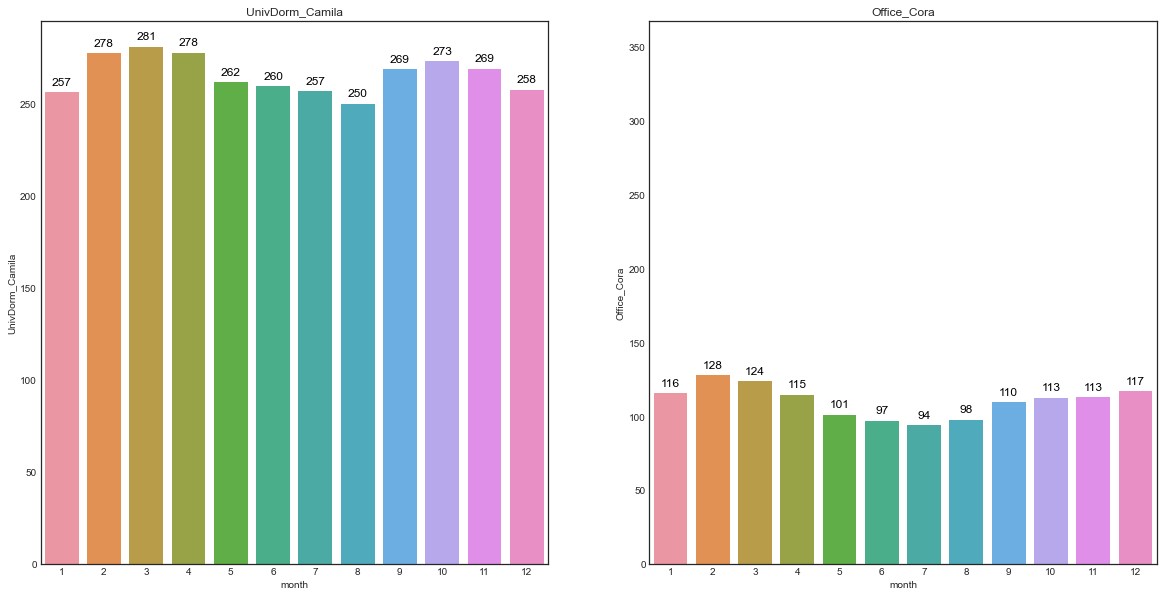

In [169]:
time_avg("month", df)

요일 기준으로 평균 에너지 변화량 비교

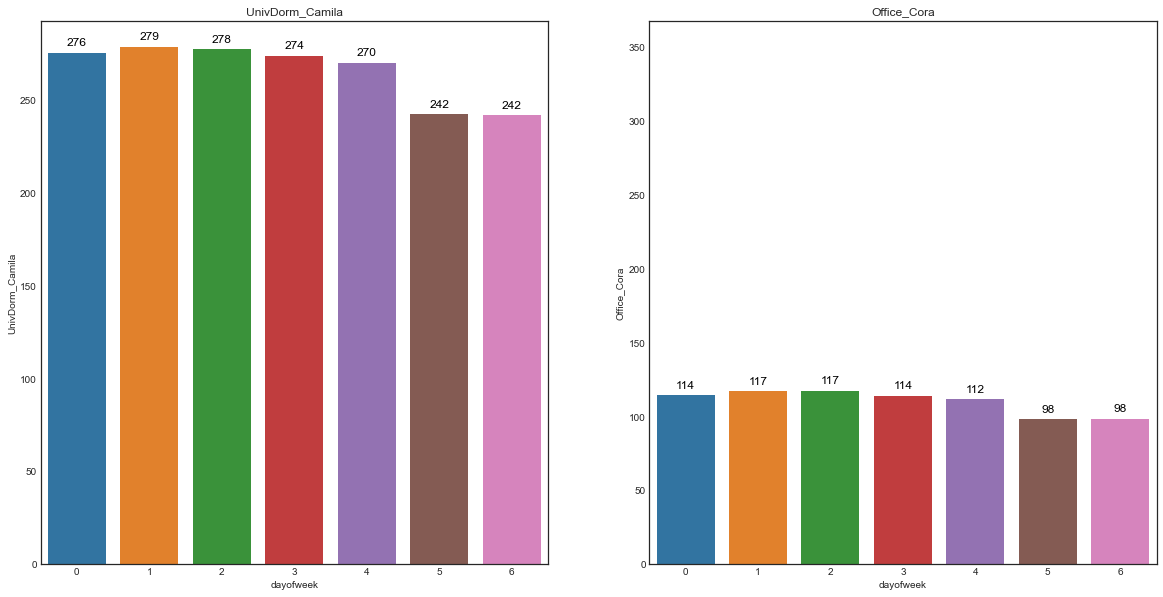

In [170]:
# 월요일(0) -> 일요일(6)
time_avg("dayofweek", df)

하루 시간별 평균 에너지 사용량 비교
office의 경우 평일하고 주말의 에너지 사용량이 다를거 같으니 구분해서 시각화

In [171]:
# 코드를 깔금하게 하기위해 df에 평일 주말 구분할 컬럼 만들어주기
df.loc[df["dayofweek"] == 5, "weekend"] = 1
df.loc[df["dayofweek"] == 6, "weekend"] = 1
df["weekend"] = df["weekend"].fillna(0)
df

,Conditions,Dew PointC,Events,Gust SpeedKm/h,Humidity,Precipitationmm,Sea Level PressurehPa,TemperatureC,VisibilityKm,Wind Direction,...,WindDirDegrees,date,year,month,day,hour,dayofweek,UnivDorm_Camila,Office_Cora,weekend
0,Overcast,-15.0,NaN,-,54.0,NaN,1017.4,-7.2,16.1,SW,...,230,2015-01-01,2015,1,1,0,3,222.625000,73.925003,0.0
1,Overcast,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,16.1,WSW,...,240,2015-01-01,2015,1,1,1,3,225.199997,75.875000,0.0
2,Overcast,-14.4,NaN,-,55.0,NaN,1016.9,-6.6,16.1,SW,...,220,2015-01-01,2015,1,1,2,3,223.750000,76.025002,0.0
3,Overcast,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,16.1,SW,...,220,2015-01-01,2015,1,1,3,3,228.149994,75.349998,0.0
4,Overcast,-14.4,NaN,-,55.0,NaN,1017.2,-6.6,16.1,SSW,...,210,2015-01-01,2015,1,1,4,3,214.600006,72.250000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8565,Light Snow,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,16.1,NNW,...,330,2015-12-31,2015,12,31,17,3,224.975006,100.799995,0.0
8566,Light Snow,-2.0,Snow,-,93.0,NaN,1019.2,-1.0,8.0,NNW,...,330,2015-12-31,2015,12,31,18,3,228.225006,96.375000,0.0
8567,Light Snow,-1.0,Snow,-,100.0,NaN,1019.5,-1.0,6.4,NNW,...,330,2015-12-31,2015,12,31,19,3,239.975006,97.800003,0.0
8568,Light Snow,-1.0,Snow,-,100.0,NaN,1019.2,-1.0,6.4,NNW,...,330,2015-12-31,2015,12,31,20,3,242.925003,98.650002,0.0


In [172]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8570 entries, 0 to 8569
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Conditions             8570 non-null   object 
 1   Dew PointC             8570 non-null   float64
 2   Events                 1424 non-null   object 
 3   Gust SpeedKm/h         8570 non-null   object 
 4   Humidity               8559 non-null   float64
 5   Precipitationmm        1874 non-null   float64
 6   Sea Level PressurehPa  8570 non-null   float64
 7   TemperatureC           8570 non-null   float64
 8   VisibilityKm           8570 non-null   float64
 9   Wind Direction         8570 non-null   object 
 10  Wind SpeedKm/h         8570 non-null   object 
 11  WindDirDegrees         8570 non-null   int64  
 12  date                   8570 non-null   object 
 13  year                   8570 non-null   int64  
 14  month                  8570 non-null   int64  
 15  day 

In [178]:
# 시간 기준으로 에너지 평균 값 시각화
def day_avg(time, dataframe, n):
    fig, ax = plt.subplots(1, 2, figsize=(20, 10))

    df_plot = dataframe.groupby(["weekend", time]).mean().reset_index()
    max_val = np.ceil(max(df["UnivDorm_Camila"]))

    g1 = sns.barplot(data=df_plot.query("weekend == {}".format(n)), ax=ax[0], x=time, y="UnivDorm_Camila")
    for p in g1.patches:
        g1.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')



    g2 = sns.barplot(data=df_plot.query("weekend == {}".format(n)), ax=ax[1], x=time, y="Office_Cora")
    for p in g2.patches:
        g2.annotate('%.0f' % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()),
                   ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), textcoords='offset points')

    plt.ylim(0, max_val)

    ax[0].set_title("UnivDorm_Camila")
    ax[1].set_title("Office_Cora")

    plt.show()

평일 시간당 에너지 평균 사용량 비교

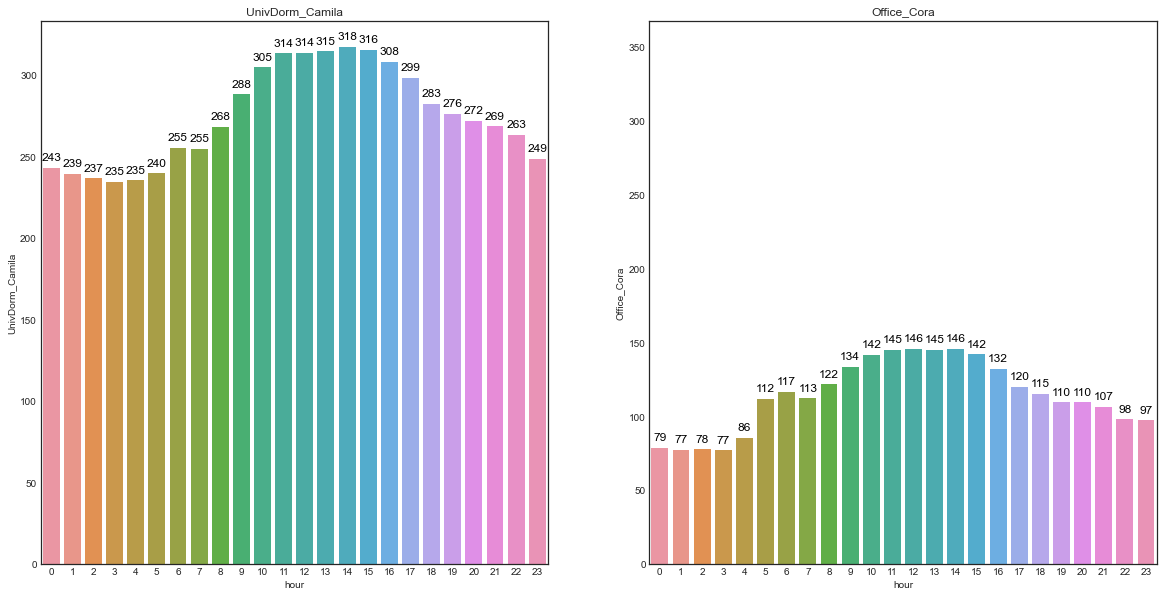

In [179]:
day_avg("hour", df, 0)

주말 에너지 시간당 평균 사용량

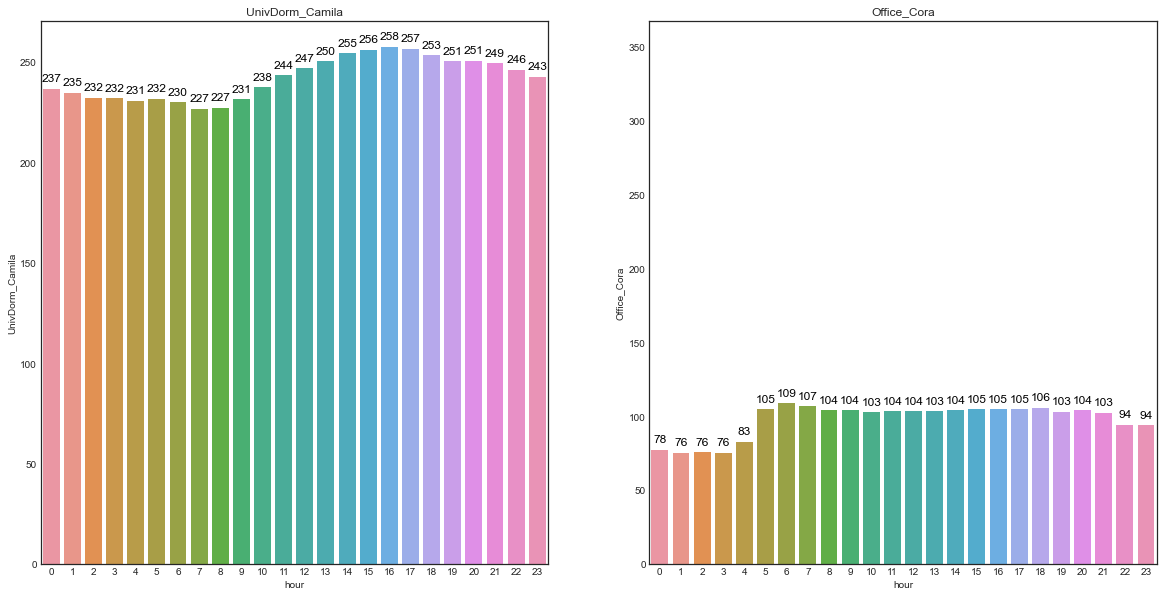

In [180]:
day_avg("hour", df, 1)